In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [ ]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.tail()

,0,1,2,3,4,5,6,7,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [ ]:
abalone.shape

(4177, 9)

In [ ]:
#first analysis, numerical gap between 8 and other parameters is very large, 8 is discrete
#second analysis, also the zeroth column as alphabetical values

In [ ]:
abalone.columns = [
     "Sex",
     "Length",
     "Diameter",
     "Height",
     "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings",
 ]

In [ ]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [ ]:
numerical_features=abalone.select_dtypes(include=[np.number]).columns
categorical_features=abalone.select_dtypes(include=[np.object]).columns

<ipython-input-167-0db08819c9f0>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features=abalone.select_dtypes(include=[np.object]).columns


In [ ]:
print(numerical_features)
print(categorical_features)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
Index(['Sex'], dtype='object')


In [ ]:
missing_values=abalone.isnull().sum()
percentage_missing_values=(missing_values/len(abalone))*100
pd.concat([missing_values,percentage_missing_values],axis=1,keys=["Missing Value","Percentage Missing"])

,Missing Value,Percentage Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [ ]:
#Univariate Analysis

#Draw Histogram
#Analyse the value count

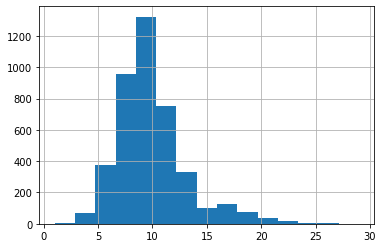

In [ ]:
abalone["Rings"].hist(bins=15)

In [ ]:
abalone["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [ ]:
#low values as per here will degrade the performance of our model. So we should avoid using it until and unless we have been asked to so.

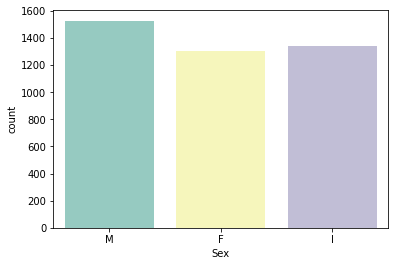

In [ ]:
sns.countplot(x="Sex", palette="Set3",data=abalone)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2da4e7f3a0>,
      dtype=object)

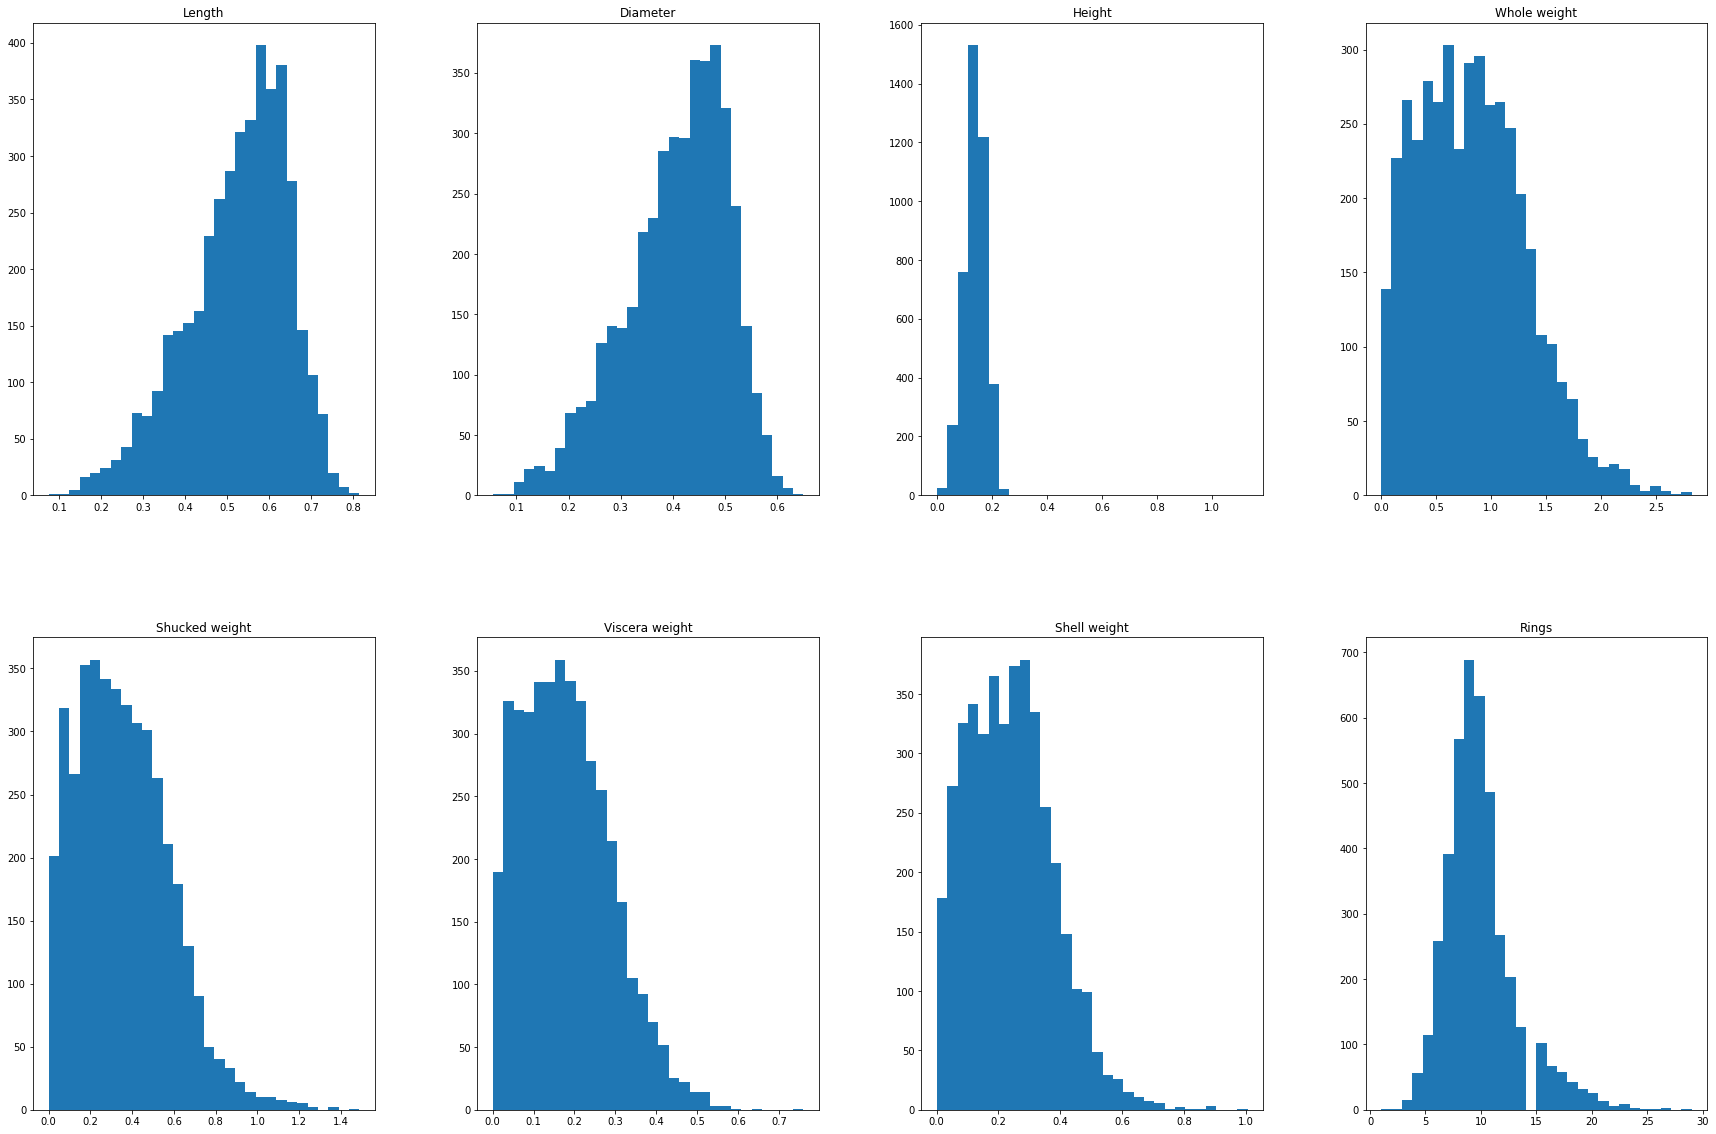

In [ ]:
abalone.hist(figsize=(30,20),grid=False, layout=(2,4), bins=30)

In [ ]:
#Bivariate Analysis to analyse the specific correlation among the parameters

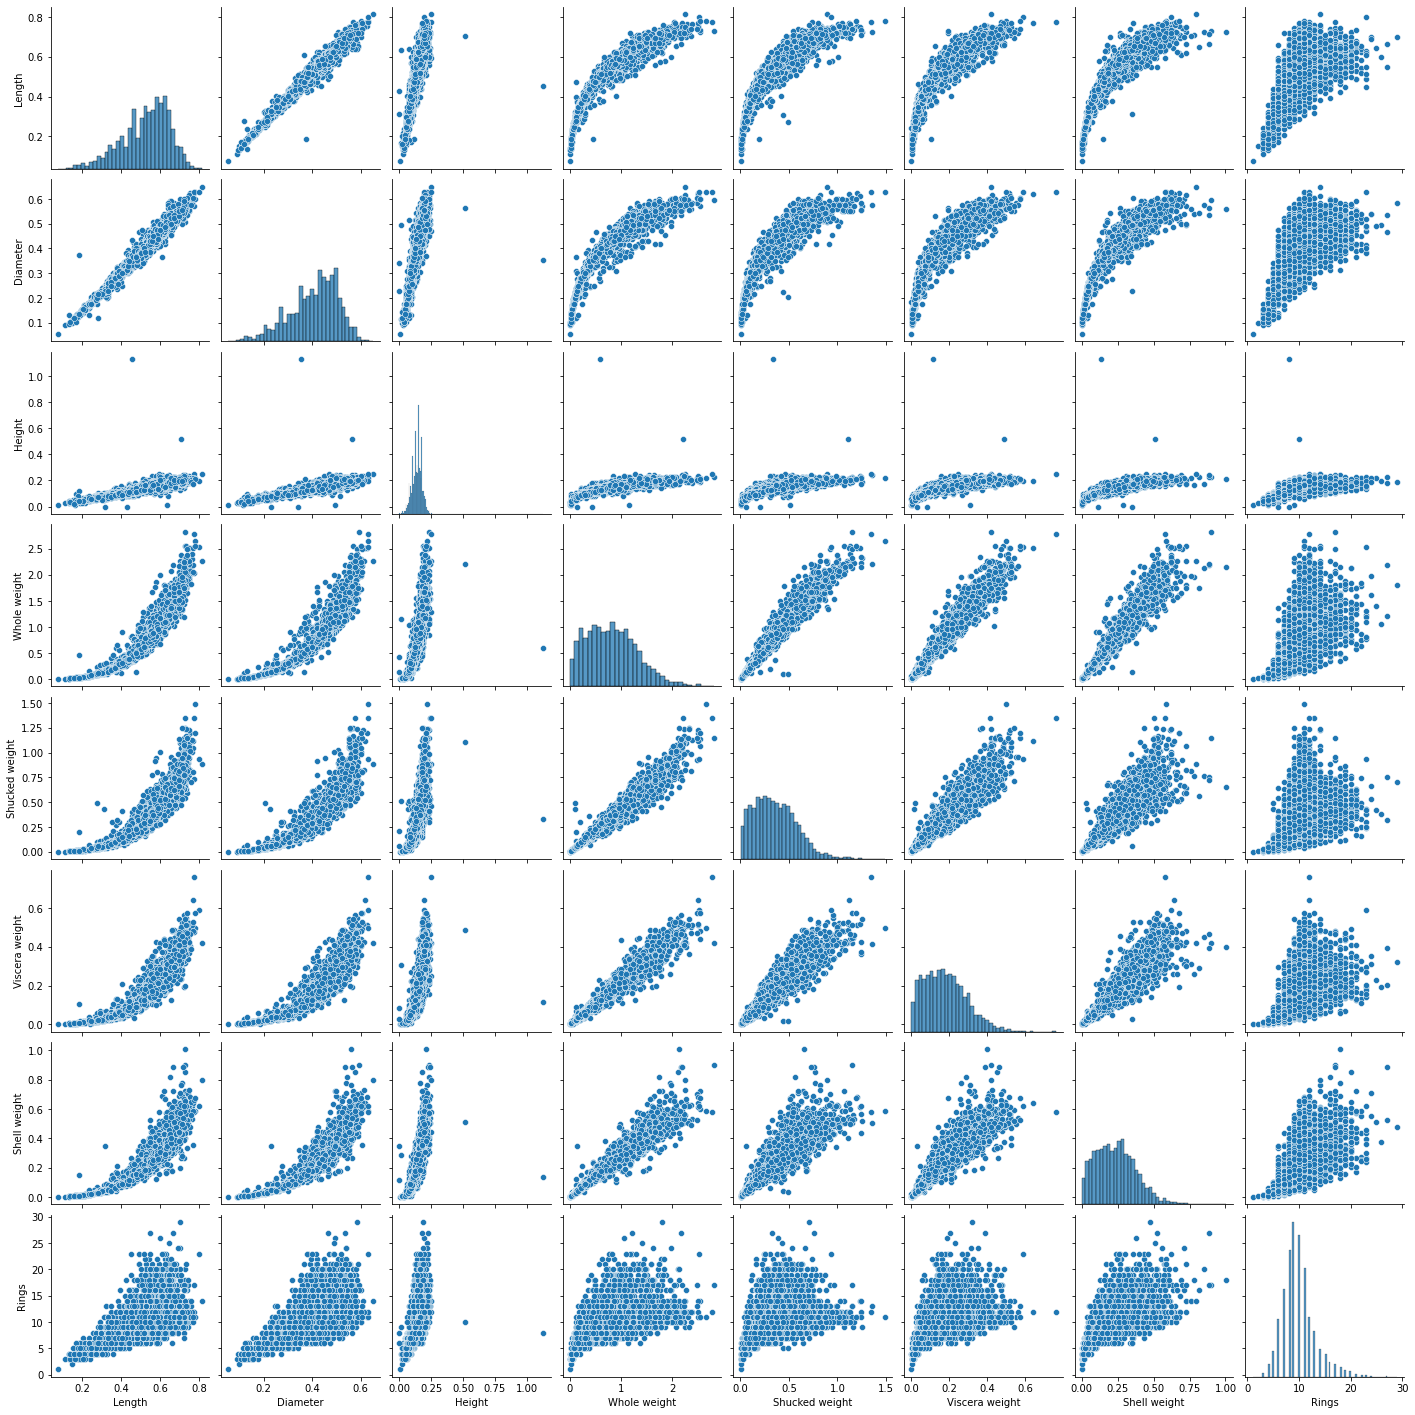

In [ ]:
sns.pairplot(abalone[numerical_features])

In [ ]:
#observe a linear trend, for example line shell weight and whole weight. 

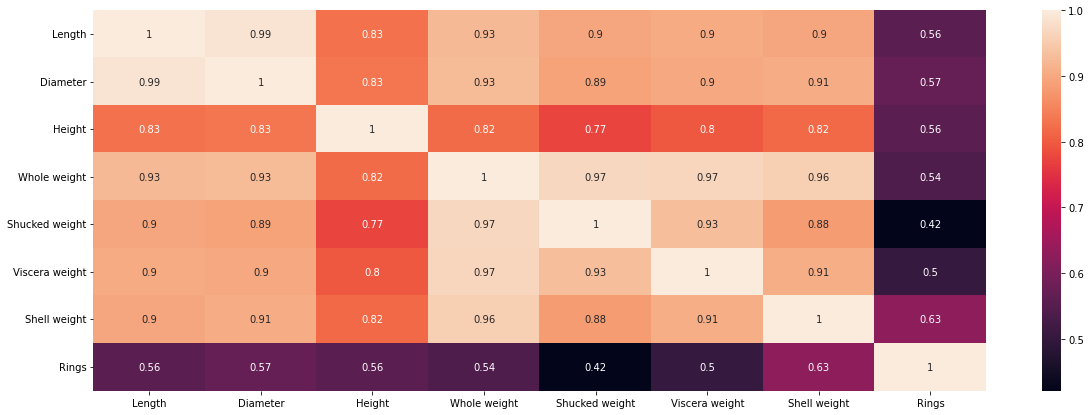

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(abalone[numerical_features].corr(),annot=True)

In [ ]:
#nearer to one means that they are correlated to each other. You can drop those features.(either)
#now we need to check for outliers, that is data which behaves abnormally as compared to most of the data

In [ ]:
data_abalone=pd.get_dummies(abalone)
dummy_data=data_abalone.copy()

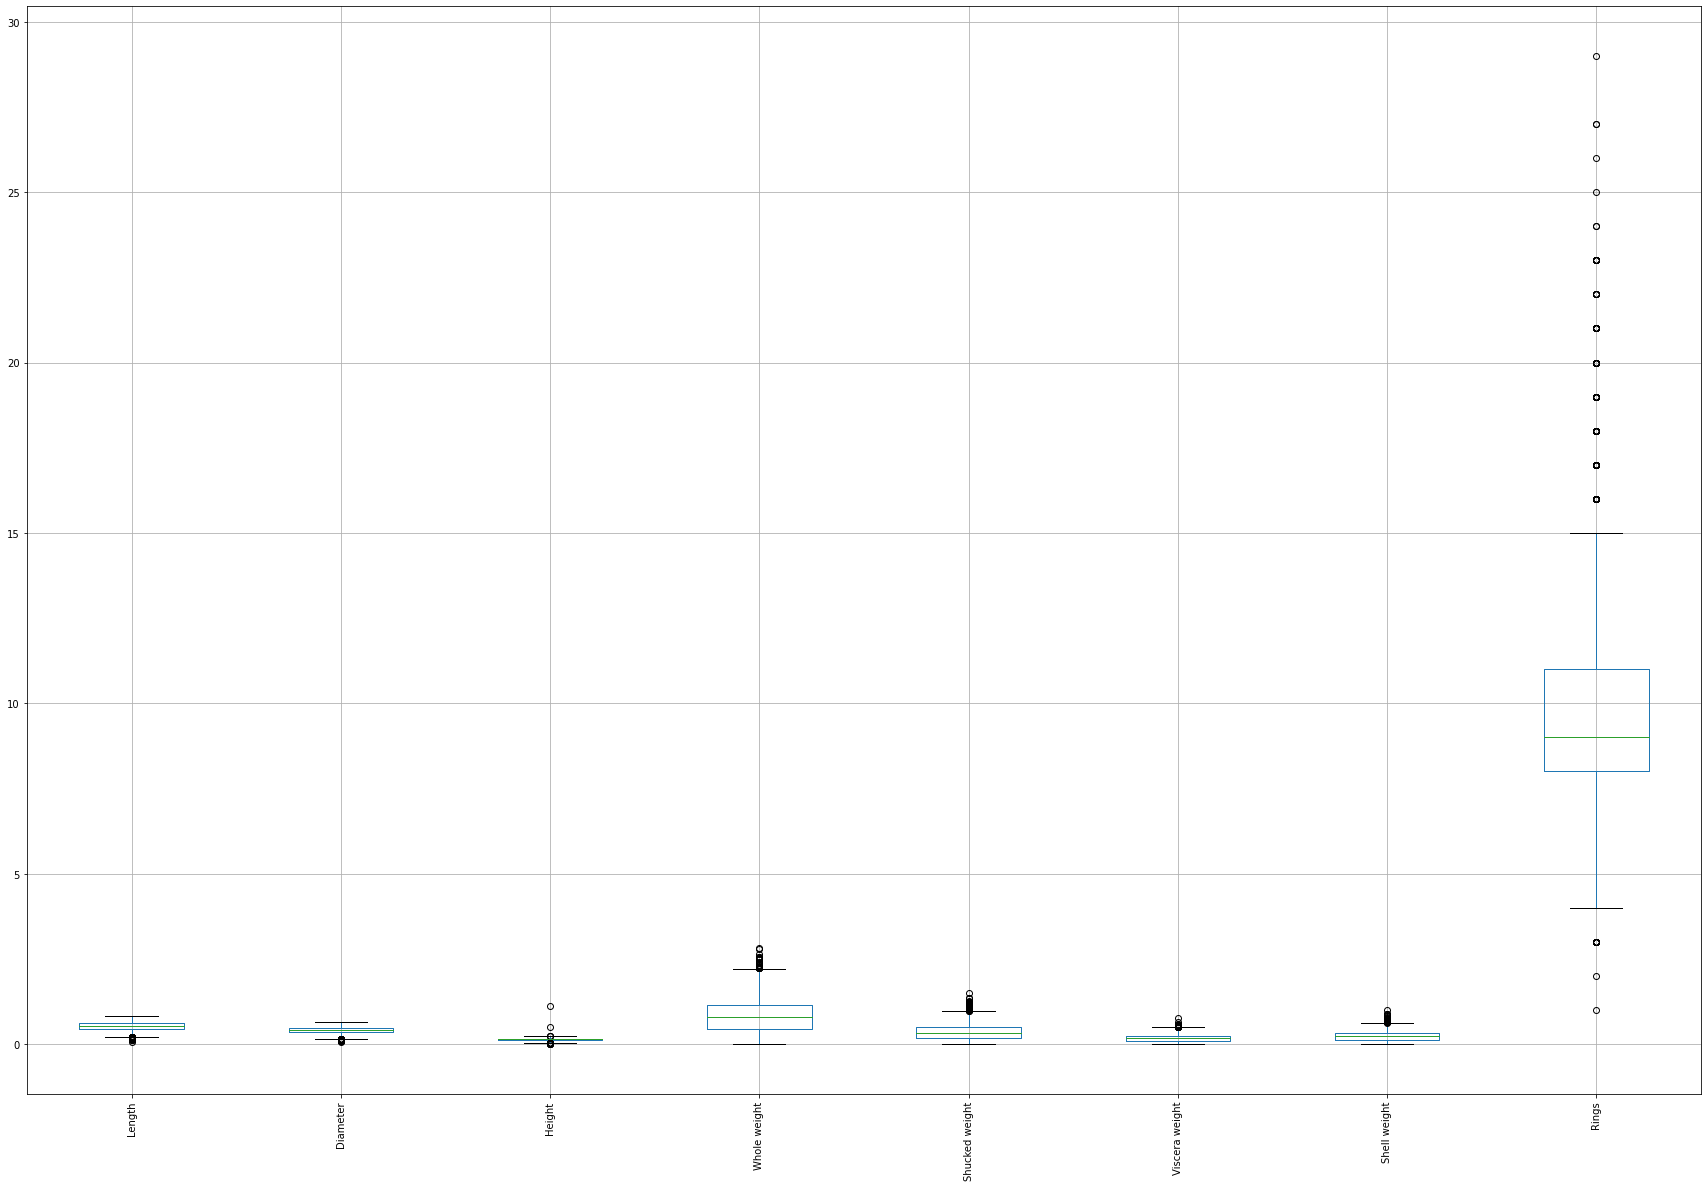

In [ ]:
abalone.boxplot(rot=90, figsize=(30,20))

In [ ]:
#Data Modelling
#regression kind of data, so drop the target variable

In [ ]:
X=abalone.drop("Rings",axis=1)
X=X.values
y=abalone["Rings"]
y=y.values
X

array([['M', 0.455, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
print(ct)
X=np.array(ct.fit_transform(X))

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])


In [ ]:
X

array([[0.0, 0.0, 1.0, ..., 0.2245, 0.101, 0.15],
       [0.0, 0.0, 1.0, ..., 0.0995, 0.0485, 0.07],
       [1.0, 0.0, 0.0, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.0, 0.0, 1.0, ..., 0.5255, 0.2875, 0.308],
       [1.0, 0.0, 0.0, ..., 0.531, 0.261, 0.296],
       [0.0, 0.0, 1.0, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train

array([ 9, 17, 11, ...,  8, 14,  8])

In [ ]:
y_test

array([13, 11,  7, 11,  7,  9,  9,  9, 10, 10,  8, 10, 18,  9, 14, 10, 15,
       10,  9, 12, 10, 11, 15, 11, 12,  8,  8,  9, 10, 12, 13, 10, 15,  8,
        7, 13, 11,  6,  7, 10, 14, 10, 11, 16,  8, 15, 13,  9, 10, 10, 12,
       10, 10, 12, 12, 13,  8,  9, 11, 14, 11,  6,  9,  7, 15, 10,  9, 12,
       10,  9, 13,  7,  9, 12, 10, 23,  8, 10, 11, 19,  7,  8,  8,  7,  9,
       10,  6, 11,  7,  7, 15,  6, 19, 10,  9, 10,  8, 10,  9, 10,  9,  9,
       16, 12, 10, 10,  8, 10,  9,  8, 11,  7,  9, 10,  5, 12,  7, 10, 10,
        6,  7, 10,  9,  6,  9,  4,  5, 13,  6, 11,  8, 16, 11,  8,  9,  8,
       10,  5,  7,  7, 22,  9, 10,  9,  9, 10, 18,  8,  9,  7, 14,  8,  9,
       10,  6,  9, 15, 12, 12, 11,  7, 13, 15,  7, 12, 10, 11, 14,  9, 11,
       10,  8, 17,  9,  9,  9, 14,  8,  7,  8,  9,  9,  9, 11,  7,  8, 10,
       11,  9, 10,  9,  5,  7,  5, 10,  8, 13,  8,  6,  8, 10, 10, 11,  8,
        7,  8,  7, 12, 10,  7, 11,  7,  9, 12, 10, 18, 10,  8, 10,  8,  7,
        9,  9, 14,  8,  9

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_pred=knn_model.predict(X_train)
mse=mean_squared_error(y_train,train_pred)
rmse=sqrt(mse)
print(rmse)

1.6594676408743605


In [ ]:
X_test

array([[1.0, 0.0, 0.0, ..., 0.313, 0.1715, 0.263],
       [1.0, 0.0, 0.0, ..., 0.8725, 0.4565, 0.475],
       [0.0, 0.0, 1.0, ..., 0.235, 0.13, 0.141],
       ...,
       [0.0, 0.0, 1.0, ..., 0.321, 0.1975, 0.2445],
       [0.0, 0.0, 1.0, ..., 0.408, 0.234, 0.58],
       [0.0, 0.0, 1.0, ..., 0.416, 0.2105, 0.365]], dtype=object)

In [ ]:
test_pred=knn_model.predict(X_test)
mse=mean_squared_error(y_test,test_pred)
rmse=sqrt(mse)
print(rmse)

2.419188312082008


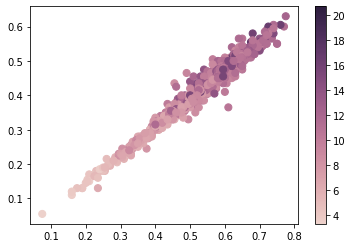

In [ ]:
cmap=sns.cubehelix_palette(as_cmap=True)
f , ax = plt.subplots()
points=ax.scatter(X_test[:,3],X_test[:,4],s=50,cmap=cmap,c=test_pred)
f.colorbar(points)
plt.show()

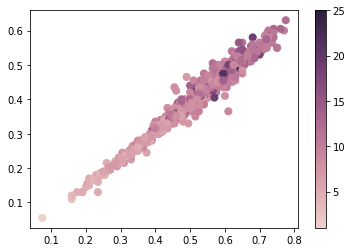

In [ ]:
cmap=sns.cubehelix_palette(as_cmap=True)
f , ax = plt.subplots()
points=ax.scatter(X_test[:,3],X_test[:,4],s=50,cmap=cmap,c=y_test)
f.colorbar(points)
plt.show()

In [ ]:
#fine tuning for the rmse values

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":range(1,50)}
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 14}

In [ ]:
test_grid_predict=gridsearch.predict(X_test)
grid_mse=mean_squared_error(test_grid_predict,y_test)
grid_rmse=sqrt(grid_mse)
grid_rmse

2.256689704634992

In [ ]:
#we have managed to reduce the rmse from a value of 2.41 to a value of 2.25